#  US Election 2020 Tweets --- Sentiment Analysis

In [1]:
#conda install -c conda-forge wordcloud
#conda install -c conda-forge textblob
#conda install geopandas

In [2]:
#imports
%matplotlib inline

import numpy as np
import pandas as pd

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.probability import FreqDist


nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
#import geopandas as gpd
#from shapely.geometry import Point

import string
import re
from textblob import TextBlob #sentimate analysis
from textblob import Word
from nltk.probability import FreqDist

from scipy import stats
import seaborn as sns; sns.set()

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from collections import Counter

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chitt\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chitt\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\chitt\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
import os
for dirname, _, filenames in os.walk(os.curdir):
    for filename in filenames:
        print(os.path.join(dirname, filename))


.\archive.zip
.\final-proj1 (4)-Copy1.ipynb
.\final-proj1 (4).ipynb
.\hashtag_donaldtrump.csv
.\hashtag_donaldtrump1.xlsx
.\hashtag_joebiden.csv
.\US Election 2020 Tweets --- Sentiment Analysis-Copy1.ipynb
.\US Election 2020 Tweets --- Sentiment Analysis-Copy2.ipynb
.\US Election 2020 Tweets --- Sentiment Analysis.ipynb
.\us-election-2020-tweets-final-Copy1.ipynb
.\us-election-2020-tweets-final.ipynb
.\.ipynb_checkpoints\final-proj1 (4)-checkpoint.ipynb
.\.ipynb_checkpoints\final-proj1 (4)-Copy1-checkpoint.ipynb
.\.ipynb_checkpoints\US Election 2020 Tweets --- Sentiment Analysis-checkpoint.ipynb
.\.ipynb_checkpoints\US Election 2020 Tweets --- Sentiment Analysis-Copy1-checkpoint.ipynb
.\.ipynb_checkpoints\US Election 2020 Tweets --- Sentiment Analysis-Copy2-checkpoint.ipynb
.\.ipynb_checkpoints\us-election-2020-tweets-final-checkpoint.ipynb
.\.ipynb_checkpoints\us-election-2020-tweets-final-Copy1-checkpoint.ipynb


In [4]:
#trump_data=pd.read_csv("../input/us-election-2020-tweets/hashtag_donaldtrump.csv",lineterminator='\n')
#biden_data=pd.read_csv("../input/us-election-2020-tweets/hashtag_joebiden.csv",lineterminator='\n')

trump_data=pd.read_csv("hashtag_donaldtrump.csv",lineterminator='\n')
biden_data=pd.read_csv("hashtag_joebiden.csv",lineterminator='\n')

## Trump

In [5]:
trump_data.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00
1,2020-10-15 00:00:01,1.316529e+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,3.316176e+08,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,...,1067661.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.373216530
2,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,1185.0,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060
3,2020-10-15 00:00:02,1.316529e+18,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,Trumpytweeter,8.283556e+17,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we b...",...,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.119649591
4,2020-10-15 00:00:08,1.316529e+18,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - رنا أبتر,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",...,5393.0,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121


In [6]:
trump_data.describe()

,tweet_id,likes,retweet_count,user_id,user_followers_count,lat,long
count,9.709190e+05,970919.000000,970919.000000,9.709190e+05,9.709190e+05,445719.000000,445719.000000
mean,1.322494e+18,7.477011,1.698500,4.468311e+17,2.260357e+04,35.697936,-40.369638
std,2.555133e+15,158.058117,40.028419,5.544702e+17,3.042152e+05,18.823129,67.531751
min,1.316529e+18,0.000000,0.000000,5.310000e+02,0.000000e+00,-90.000000,-175.202642
25%,1.320478e+18,0.000000,0.000000,2.169326e+08,7.700000e+01,32.701939,-96.796856
50%,1.323612e+18,0.000000,0.000000,2.373392e+09,4.410000e+02,39.783730,-74.006015
75%,1.324505e+18,1.000000,0.000000,1.078344e+18,2.066000e+03,46.603354,6.776314
max,1.325589e+18,74084.000000,20491.000000,1.325581e+18,1.911533e+07,90.000000,179.048837


In [7]:
trump_data.isnull().sum()

created_at                   0
tweet_id                     0
tweet                        0
likes                        0
retweet_count                0
source                     876
user_id                      0
user_name                   16
user_screen_name             0
user_description        101266
user_join_date               0
user_followers_count         0
user_location           294953
lat                     525200
long                    525200
city                    743732
country                 528171
continent               528154
state                   650299
state_code              670494
collected_at                 0
dtype: int64

In [8]:
trump_data=trump_data.drop(columns=['tweet_id', 'collected_at', 'user_description','user_screen_name','user_join_date'])

In [9]:
trump_data.head()

,created_at,tweet,likes,retweet_count,source,user_id,user_name,user_followers_count,user_location,lat,long,city,country,continent,state,state_code
0,2020-10-15 00:00:01,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL
1,2020-10-15 00:00:01,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,3.316176e+08,Tgcom24,1067661.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-10-15 00:00:02,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,1185.0,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR
3,2020-10-15 00:00:02,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,Trumpytweeter,8.283556e+17,Trumpytweeter,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-10-15 00:00:08,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - رنا أبتر,5393.0,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC


In [10]:
trump_data=trump_data.dropna()

In [11]:
trump_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199165 entries, 2 to 970912
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            199165 non-null  object 
 1   tweet                 199165 non-null  object 
 2   likes                 199165 non-null  float64
 3   retweet_count         199165 non-null  float64
 4   source                199165 non-null  object 
 5   user_id               199165 non-null  float64
 6   user_name             199165 non-null  object 
 7   user_followers_count  199165 non-null  float64
 8   user_location         199165 non-null  object 
 9   lat                   199165 non-null  float64
 10  long                  199165 non-null  float64
 11  city                  199165 non-null  object 
 12  country               199165 non-null  object 
 13  continent             199165 non-null  object 
 14  state                 199165 non-null  object 
 15  

In [12]:
trump_data.describe()

,likes,retweet_count,user_id,user_followers_count,lat,long
count,199165.000000,199165.000000,1.991650e+05,1.991650e+05,199165.000000,199165.000000
mean,11.449537,2.570748,2.962475e+17,3.219419e+04,36.548171,-43.349355
std,246.992555,62.097747,4.839031e+17,2.643791e+05,18.228199,65.770987
min,0.000000,0.000000,3.471000e+03,0.000000e+00,-43.530955,-158.077849
25%,0.000000,0.000000,8.775513e+07,1.600000e+02,33.749099,-87.624421
50%,0.000000,0.000000,5.794535e+08,7.880000e+02,40.712728,-74.006015
75%,2.000000,0.000000,7.752435e+17,3.075000e+03,48.856697,2.351462
max,74084.000000,20491.000000,1.325569e+18,1.321603e+07,64.837845,175.281788


In [13]:
trump_data.loc[:,'tweet_for']='Trump'

In [14]:
trump_data.head()

,created_at,tweet,likes,retweet_count,source,user_id,user_name,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,tweet_for
2,2020-10-15 00:00:02,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,1185.0,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,Trump
4,2020-10-15 00:00:08,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - رنا أبتر,5393.0,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,Trump
11,2020-10-15 00:00:25,"In 2020, #NYPost is being #censorship #CENSORE...",0.0,0.0,Twitter for iPhone,1.994033e+07,Change Illinois | Biden will increase taxes by...,1396.0,"Chicago, Illinois",41.875562,-87.624421,Chicago,United States of America,North America,Illinois,IL,Trump
12,2020-10-15 00:00:26,#Trump #PresidentTrump #Trump2020LandslideVict...,3.0,5.0,Twitter for Android,1.243315e+18,Ron Burgundy,496.0,"San Diego, CA",32.717421,-117.162771,San Diego,United States of America,North America,California,CA,Trump
13,2020-10-15 00:00:31,@Susan_Hutch @JoeBiden #Ukraine @RealDonaldTru...,2.0,0.0,Twitter Web App,3.439562e+08,Sebastian White,2755.0,Edinburgh ~ Heart of Scotland!,55.953346,-3.188375,City of Edinburgh,United Kingdom,Europe,Scotland,SCT,Trump


## Biden

In [15]:
biden_data.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00
1,2020-10-15 00:00:18,1.316529e+18,#HunterBiden #HunterBidenEmails #JoeBiden #Joe...,0.0,0.0,Twitter for iPad,8.099044e+08,Cheri A. 🇺🇸,Biloximeemaw,"Locked and loaded Meemaw. Love God, my family ...",...,6628.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.517827283
2,2020-10-15 00:00:20,1.316529e+18,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,0.0,0.0,Twitter Web App,3.494182e+09,Flag Waver,Flag_Wavers,NaN,...,1536.0,Golden Valley Arizona,46.304036,-109.171431,NaN,United States of America,North America,Montana,MT,2020-10-21 00:00:01.035654566
3,2020-10-15 00:00:21,1.316529e+18,@chrislongview Watching and setting dvr. Let’s...,0.0,0.0,Twitter for iPhone,8.242596e+17,Michelle Ferg,MichelleFerg4,NaN,...,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.553481849
4,2020-10-15 00:00:22,1.316529e+18,#censorship #HunterBiden #Biden #BidenEmails #...,1.0,0.0,Twitter Web App,1.032807e+18,the Gold State,theegoldstate,A Silicon Valley #independent #News #Media #St...,...,390.0,"California, USA",36.701463,-118.755997,NaN,United States of America,North America,California,CA,2020-10-21 00:00:02.071309132


In [16]:
biden_data.describe()

,tweet_id,likes,retweet_count,user_id,user_followers_count,lat,long
count,7.768860e+05,776886.000000,776886.000000,7.768860e+05,7.768860e+05,355293.000000,355293.000000
mean,1.322844e+18,10.161164,2.131331,4.532033e+17,2.884994e+04,35.104203,-41.979660
std,2.585560e+15,390.974423,96.661527,5.573483e+17,4.141085e+05,17.907910,67.823724
min,1.316529e+18,0.000000,0.000000,1.081000e+03,0.000000e+00,-79.406307,-172.120051
25%,1.320870e+18,0.000000,0.000000,2.257285e+08,7.400000e+01,31.816038,-97.268406
50%,1.323899e+18,0.000000,0.000000,2.464208e+09,4.280000e+02,39.783730,-74.006015
75%,1.325115e+18,2.000000,0.000000,1.088044e+18,2.081000e+03,43.653482,5.966069
max,1.325589e+18,165702.000000,63473.000000,1.325575e+18,8.241710e+07,90.000000,179.048837


In [17]:
biden_data.isnull().sum()

created_at                   0
tweet_id                     0
tweet                        0
likes                        0
retweet_count                0
source                     713
user_id                      0
user_name                   18
user_screen_name             0
user_description         82006
user_join_date               0
user_followers_count         0
user_location           233791
lat                     421593
long                    421593
city                    590014
country                 423107
continent               423089
state                   516691
state_code              532277
collected_at                 0
dtype: int64

In [18]:
biden_data=biden_data.drop(columns=['tweet_id', 'collected_at', 'user_description','user_screen_name','user_join_date'])

In [19]:
biden_data.head()

,created_at,tweet,likes,retweet_count,source,user_id,user_name,user_followers_count,user_location,lat,long,city,country,continent,state,state_code
0,2020-10-15 00:00:01,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL
1,2020-10-15 00:00:18,#HunterBiden #HunterBidenEmails #JoeBiden #Joe...,0.0,0.0,Twitter for iPad,8.099044e+08,Cheri A. 🇺🇸,6628.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-10-15 00:00:20,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,0.0,0.0,Twitter Web App,3.494182e+09,Flag Waver,1536.0,Golden Valley Arizona,46.304036,-109.171431,NaN,United States of America,North America,Montana,MT
3,2020-10-15 00:00:21,@chrislongview Watching and setting dvr. Let’s...,0.0,0.0,Twitter for iPhone,8.242596e+17,Michelle Ferg,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-10-15 00:00:22,#censorship #HunterBiden #Biden #BidenEmails #...,1.0,0.0,Twitter Web App,1.032807e+18,the Gold State,390.0,"California, USA",36.701463,-118.755997,NaN,United States of America,North America,California,CA


In [20]:
biden_data=biden_data.dropna()

In [21]:
biden_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164673 entries, 6 to 776881
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            164673 non-null  object 
 1   tweet                 164673 non-null  object 
 2   likes                 164673 non-null  float64
 3   retweet_count         164673 non-null  float64
 4   source                164673 non-null  object 
 5   user_id               164673 non-null  float64
 6   user_name             164673 non-null  object 
 7   user_followers_count  164673 non-null  float64
 8   user_location         164673 non-null  object 
 9   lat                   164673 non-null  float64
 10  long                  164673 non-null  float64
 11  city                  164673 non-null  object 
 12  country               164673 non-null  object 
 13  continent             164673 non-null  object 
 14  state                 164673 non-null  object 
 15  

In [22]:
biden_data.describe()

,likes,retweet_count,user_id,user_followers_count,lat,long
count,164673.000000,164673.000000,1.646730e+05,1.646730e+05,164673.000000,164673.000000
mean,16.784579,3.361729,3.205418e+17,3.967030e+04,35.963481,-45.077640
std,555.000547,84.268318,5.005052e+17,3.385202e+05,17.245318,65.680267
min,0.000000,0.000000,1.081000e+03,0.000000e+00,-43.530955,-158.077849
25%,0.000000,0.000000,9.641200e+07,1.460000e+02,32.776272,-87.624421
50%,1.000000,0.000000,7.704772e+08,7.280000e+02,39.962260,-74.006015
75%,2.000000,0.000000,8.225108e+17,3.189000e+03,45.497216,2.351462
max,165702.000000,20615.000000,1.325550e+18,1.321635e+07,64.837845,176.167505


In [23]:
biden_data.loc[:,'tweet_for']='Biden'

In [24]:
biden_data.head()

,created_at,tweet,likes,retweet_count,source,user_id,user_name,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,tweet_for
6,2020-10-15 00:00:25,"In 2020, #NYPost is being #censorship #CENSORE...",0.0,0.0,Twitter for iPhone,1.994033e+07,Change Illinois | Biden will increase taxes by...,1397.0,"Chicago, Illinois",41.875562,-87.624421,Chicago,United States of America,North America,Illinois,IL,Biden
17,2020-10-15 00:01:23,"Comments on this? ""Do Democrats Understand how...",0.0,0.0,Twitter Web App,1.016593e+08,John Ubaldi,83.0,"Tampa, Florida",27.947760,-82.458444,Tampa,United States of America,North America,Florida,FL,Biden
22,2020-10-15 00:01:47,Twitter is doing everything they can to help D...,1.0,0.0,Twitter for iPhone,1.139962e+18,Wynward,2.0,"Hollywood, FL",34.098003,-118.329523,Los Angeles,United States of America,North America,California,CA,Biden
25,2020-10-15 00:01:57,@RealJamesWoods #BidenCrimeFamily #JoeBiden #H...,0.0,0.0,Twitter for Android,1.300837e+18,Sam KEYS,29.0,"Los Angeles, CA",34.053691,-118.242766,Los Angeles,United States of America,North America,California,CA,Biden
28,2020-10-15 00:02:05,#Trump #Obama #Clinton #Biden\n\n#ManWomanPers...,0.0,0.0,Twitter for iPhone,1.321631e+08,Saroop Rooprai FIA,841.0,"London, UK",51.507322,-0.127647,London,United Kingdom,Europe,England,ENG,Biden


## Combined Trump + Biden

In [25]:
total_data=pd.concat([trump_data,biden_data])
total_data.sort_values(by='created_at')

,created_at,tweet,likes,retweet_count,source,user_id,user_name,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,tweet_for
2,2020-10-15 00:00:02,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,1185.0,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,Trump
4,2020-10-15 00:00:08,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - رنا أبتر,5393.0,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,Trump
6,2020-10-15 00:00:25,"In 2020, #NYPost is being #censorship #CENSORE...",0.0,0.0,Twitter for iPhone,1.994033e+07,Change Illinois | Biden will increase taxes by...,1397.0,"Chicago, Illinois",41.875562,-87.624421,Chicago,United States of America,North America,Illinois,IL,Biden
11,2020-10-15 00:00:25,"In 2020, #NYPost is being #censorship #CENSORE...",0.0,0.0,Twitter for iPhone,1.994033e+07,Change Illinois | Biden will increase taxes by...,1396.0,"Chicago, Illinois",41.875562,-87.624421,Chicago,United States of America,North America,Illinois,IL,Trump
12,2020-10-15 00:00:26,#Trump #PresidentTrump #Trump2020LandslideVict...,3.0,5.0,Twitter for Android,1.243315e+18,Ron Burgundy,496.0,"San Diego, CA",32.717421,-117.162771,San Diego,United States of America,North America,California,CA,Trump
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970896,2020-11-08 23:58:54,@TeamTrump @alex281832 #Trump is being made to...,1.0,0.0,Twitter for Android,5.008862e+08,Ken Noble😎,453.0,"West London, UK",51.532568,-0.480700,London,United Kingdom,Europe,England,ENG,Trump
776876,2020-11-08 23:59:16,"Mr. #Biden, tear down that wall (with #Mexico)...",1.0,0.0,Twitter for iPhone,3.772296e+08,Tim Welch,444.0,"Auckland, NZ",-36.852095,174.763180,Auckland,New Zealand,Oceania,Auckland,AUK,Biden
970907,2020-11-08 23:59:25,"Donald Trump, Moscow, 1996, shared by @oooroma...",8.0,3.0,Twitter Web App,3.881374e+08,Elisabeth Schimpfössl,586.0,"London, England",51.507322,-0.127647,London,United Kingdom,Europe,England,ENG,Trump
970912,2020-11-08 23:59:38,Stop laying @CNN !\n#Paris and #London dont gi...,0.0,0.0,Twitter for iPhone,3.873620e+08,flaquet,27.0,PARIS,48.856697,2.351462,Paris,France,Europe,Ile-de-France,IDF,Trump


In [26]:
trump_tweets=total_data.query('(tweet_for=="Trump")').tweet.sort_values(ascending=False).count()
biden_tweets=total_data.query('(tweet_for=="Biden")').tweet.sort_values(ascending=False).count()

trump_likes=total_data.query('(tweet_for=="Trump")').likes.count()
biden_likes=total_data.query('(tweet_for=="Biden")').likes.count()

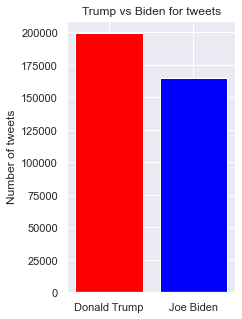

In [27]:
x_pos=('Donald Trump','Joe Biden')
y_pos=np.arange(len(x_pos))
performance=[trump_tweets,biden_tweets]
plt.figure(figsize=(3,5))
plt.bar(y_pos,performance,align='center',color=['red','blue'])
plt.xticks(y_pos,x_pos)
plt.ylabel('Number of tweets')
plt.title('Trump vs Biden for tweets')

plt.show()

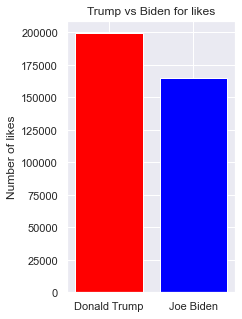

In [28]:
x_pos=('Donald Trump','Joe Biden')
y_pos=np.arange(len(x_pos))
performance=[trump_likes,biden_likes]
plt.figure(figsize=(3,5))
plt.bar(y_pos,performance,align='center',color=['red','blue'])
plt.xticks(y_pos,x_pos)
plt.ylabel('Number of likes')
plt.title('Trump vs Biden for likes')

plt.show()

In [29]:
print("Count of duplicates: {}".format(total_data.duplicated(subset=["tweet"]).sum()))

Count of duplicates: 50326


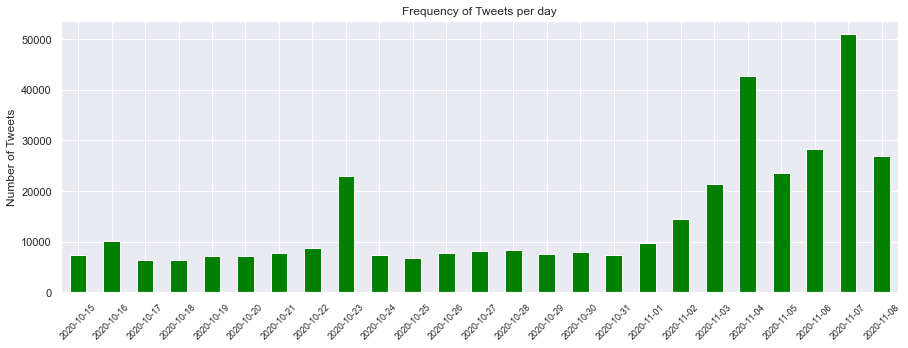

In [30]:
total_data['created_at']=pd.to_datetime(total_data['created_at'])
plt.figure(figsize=(15,5))
ax=total_data.created_at.dt.date.value_counts().sort_index().plot.bar(rot=45,color='green')
plt.setp(ax.get_xticklabels(),fontsize=9)
plt.ylabel('Number of Tweets')
plt.title('Frequency of Tweets per day')
plt.show()

In [31]:
'tweet_max=total_data.loc[total_data['retweet_count'].idxmax()]
print(f"Tweet is - \n\n'{tweet_max.tweet}'\n\nretweet_count({tweet_max.retweet_count} times)")

Tweet is - 

'America Assembled!🇺🇸🎉

@JoeBiden @KamalaHarris @BarackObama 
@ChrisEvans  @MarkRuffalo @RobertDowneyJr @brielarson @AOC @staceyabrams @michaelb4jordan @Russo_Brothers 
#Election2020 #ElectionResults2020 #joebiden #DonaldTrump #BidenHarris2020 #avengers #endgame https://t.co/cDl1VsFbOo'

retweet_count(20615.0 times)


In [32]:
print(f'Unique retweets {total_data.retweet_count.nunique()}')

Unique retweets 632


In [33]:
trump_country_y=total_data.query('(tweet_for=="Trump")').groupby(by='country').count().tweet.sort_values(ascending=False)
trump_country_x=total_data.query('(tweet_for=="Trump")').groupby(by='country').count().tweet.sort_values(ascending=False).index

biden_country_y=total_data.query('(tweet_for=="Biden")').groupby(by='country').count().tweet.sort_values(ascending=False)
biden_country_x=total_data.query('(tweet_for=="Biden")').groupby(by='country').count().tweet.sort_values(ascending=False).index

In [34]:
print(f'Unique countries {total_data.country.nunique()}')

Unique countries 51


In [35]:
total_data.head()

,created_at,tweet,likes,retweet_count,source,user_id,user_name,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,tweet_for
2,2020-10-15 00:00:02,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,1185.0,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,Trump
4,2020-10-15 00:00:08,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - رنا أبتر,5393.0,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,Trump
11,2020-10-15 00:00:25,"In 2020, #NYPost is being #censorship #CENSORE...",0.0,0.0,Twitter for iPhone,1.994033e+07,Change Illinois | Biden will increase taxes by...,1396.0,"Chicago, Illinois",41.875562,-87.624421,Chicago,United States of America,North America,Illinois,IL,Trump
12,2020-10-15 00:00:26,#Trump #PresidentTrump #Trump2020LandslideVict...,3.0,5.0,Twitter for Android,1.243315e+18,Ron Burgundy,496.0,"San Diego, CA",32.717421,-117.162771,San Diego,United States of America,North America,California,CA,Trump
13,2020-10-15 00:00:31,@Susan_Hutch @JoeBiden #Ukraine @RealDonaldTru...,2.0,0.0,Twitter Web App,3.439562e+08,Sebastian White,2755.0,Edinburgh ~ Heart of Scotland!,55.953346,-3.188375,City of Edinburgh,United Kingdom,Europe,Scotland,SCT,Trump


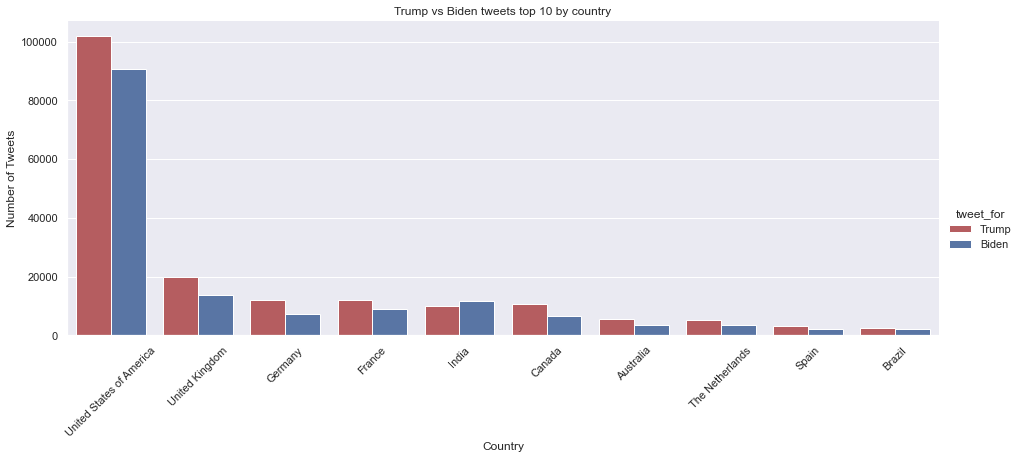

In [36]:
total_data["country"]=total_data["country"].replace({"United States":"United States of America"})
data=total_data[(total_data.country.isin(total_data.country.value_counts()[:10].index))].groupby(["country", "tweet_for"]).count().sort_values(by=["user_id"], ascending=False)["user_id"].reset_index()
ax=sns.catplot(x="country", y="user_id", hue="tweet_for", kind="bar", aspect=21/8,palette=['r', 'b'], data=data).set( xlabel='Country', ylabel='Number of Tweets',title='Trump vs Biden tweets top 10 by country')
ax.set_xticklabels(rotation=45)


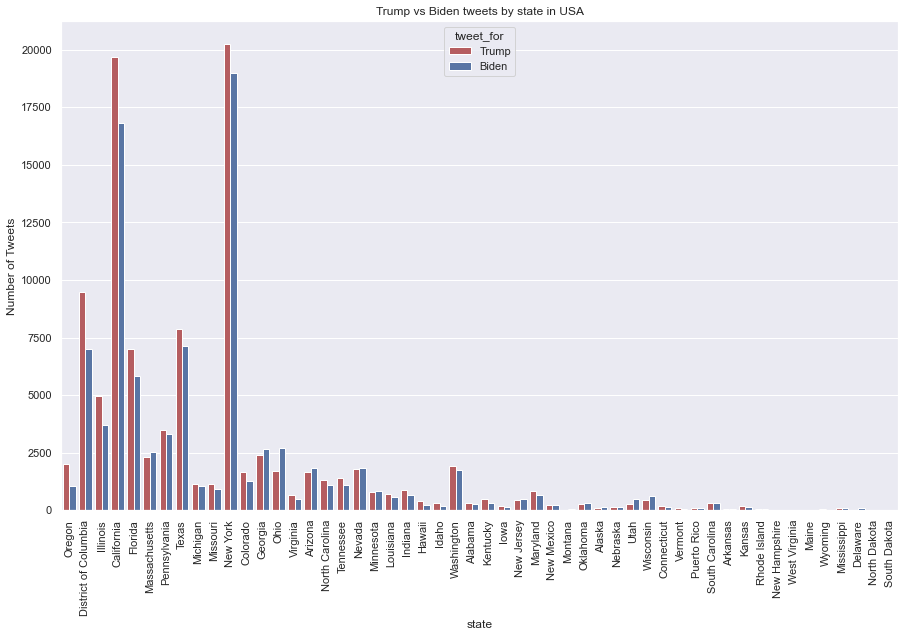

In [37]:
plt.figure(figsize=(15,9))
data=total_data.loc[total_data['country']=="United States of America"]
#data=data.groupby(by='state').count().tweet.sort_values(ascending=False)
bar_plot=sns.countplot(x='state', hue='tweet_for', data=data, palette=['r', 'b'])
#gr.set_xticklabels(gr.get_xticklabels(), rotation=90)
plt.xticks(rotation=90)
#plt.xlim(0, 10)
plt.ylabel('Number of Tweets')
plt.title('Trump vs Biden tweets by state in USA')
plt.show()

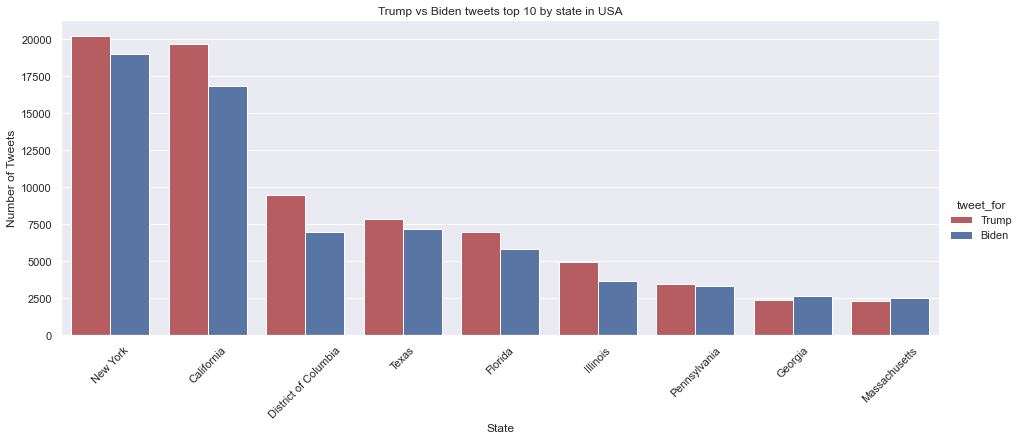

In [38]:
data=total_data[(total_data.country=="United States of America") & (total_data.state.isin(total_data.state.value_counts()[:15].index))].groupby(["state", "tweet_for"]).count().sort_values(by=["user_id"], ascending=False)["user_id"].reset_index()
ax=sns.catplot(x="state", y="user_id", hue="tweet_for", kind="bar", aspect=21/8,palette=['r', 'b'], data=data).set( xlabel='State', ylabel='Number of Tweets',title='Trump vs Biden tweets top 10 by state in USA')
ax.set_xticklabels(rotation=45)

In [39]:
total_data['source'].value_counts(ascending=False)[:10]

Twitter for iPhone      120054
Twitter Web App         116612
Twitter for Android      80864
Twitter for iPad         12551
TweetDeck                 9247
Instagram                 3969
Hootsuite Inc.            2949
Buffer                    2098
dlvr.it                    942
Twitter Media Studio       883
Name: source, dtype: int64

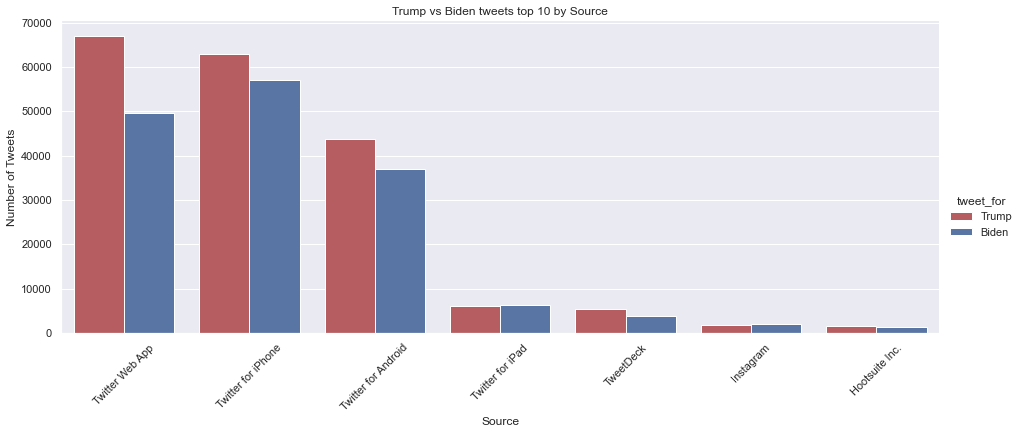

In [40]:
data=total_data[(total_data.source.isin(total_data.source.value_counts()[:7].index))].groupby(["source", "tweet_for"]).count().sort_values(by=["user_id"], ascending=False)["user_id"].reset_index()
ax=sns.catplot(x="source", y="user_id", hue="tweet_for", kind="bar", aspect=21/8,palette=['r', 'b'], data=data).set( xlabel='Source', ylabel='Number of Tweets',title='Trump vs Biden tweets top 10 by Source')
ax.set_xticklabels(rotation=45)


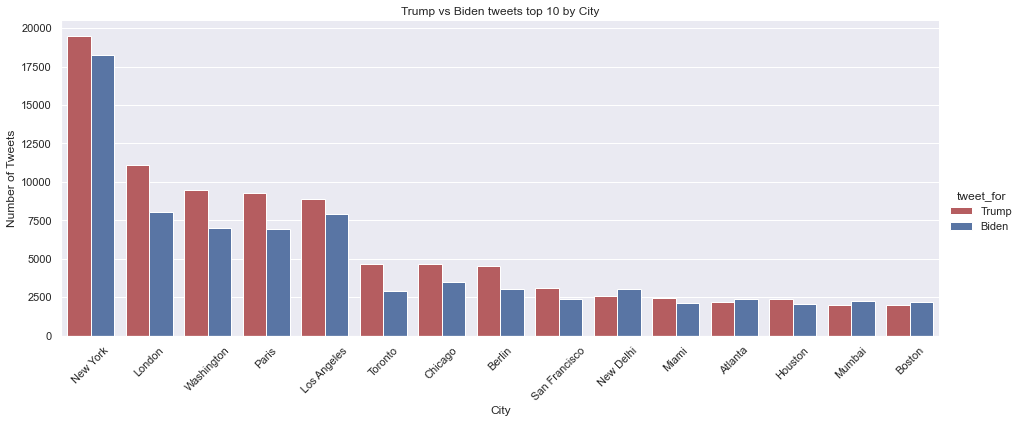

In [41]:
data=total_data[(total_data.city.isin(total_data.city.value_counts()[:15].index))].groupby(["city", "tweet_for"]).count().sort_values(by=["user_id"], ascending=False)["user_id"].reset_index()
ax=sns.catplot(x="city", y="user_id", hue="tweet_for", kind="bar", aspect=21/8,palette=['r', 'b'], data=data).set( xlabel='City', ylabel='Number of Tweets',title='Trump vs Biden tweets top 10 by City')
ax.set_xticklabels(rotation=45)


E:\000_NEU\Sft\Acon3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 127987 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\000_NEU\Sft\Acon3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 65039 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\000_NEU\Sft\Acon3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 127752 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\000_NEU\Sft\Acon3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128406 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\000_NEU\Sft\Acon3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 127996 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\000_NEU\Sft\Acon3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128509 missing from current font.
  font

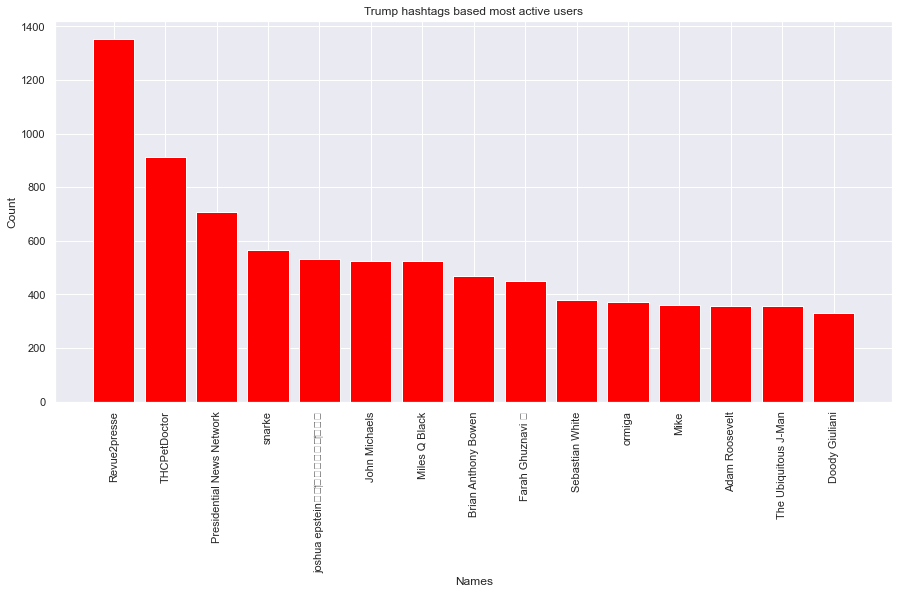

In [42]:
y=total_data.query('tweet_for=="Trump"').groupby(by='user_name').count().tweet.sort_values(ascending=False)[:15]
x=total_data.query('tweet_for=="Trump"').groupby(by='user_name').count().tweet.sort_values(ascending=False)[:15].index
plt.figure(figsize=(15, 7)) 
plt.bar(x, y,color='red')
plt.xticks(rotation=90)
plt.xlabel("Names") 
plt.ylabel("Count") 
plt.title("Trump hashtags based most active users") 
plt.show() 


E:\000_NEU\Sft\Acon3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128081 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\000_NEU\Sft\Acon3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128286 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\000_NEU\Sft\Acon3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 129512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\000_NEU\Sft\Acon3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 127864 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\000_NEU\Sft\Acon3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 127462 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\000_NEU\Sft\Acon3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 11088 missing from current font.
  font

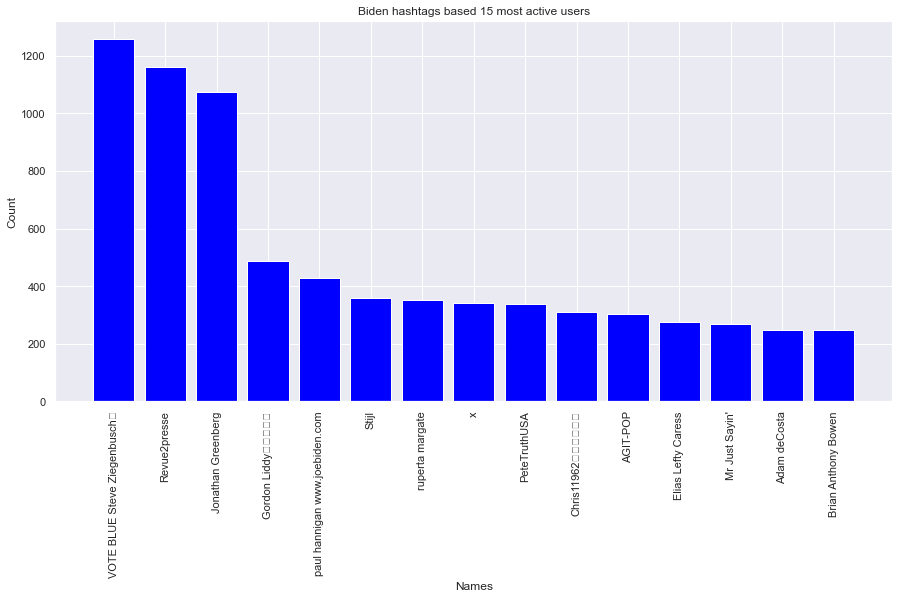

In [43]:
y=total_data.query('tweet_for=="Biden"').groupby(by='user_name').count().tweet.sort_values(ascending=False)[:15]
x=total_data.query('tweet_for=="Biden"').groupby(by='user_name').count().tweet.sort_values(ascending=False)[:15].index
plt.figure(figsize=(15, 7)) 
plt.bar(x, y,color='blue')
plt.xticks(rotation=90)
plt.xlabel("Names") 
plt.ylabel("Count") 
plt.title("Biden hashtags based 15 most active users") 
plt.show() 


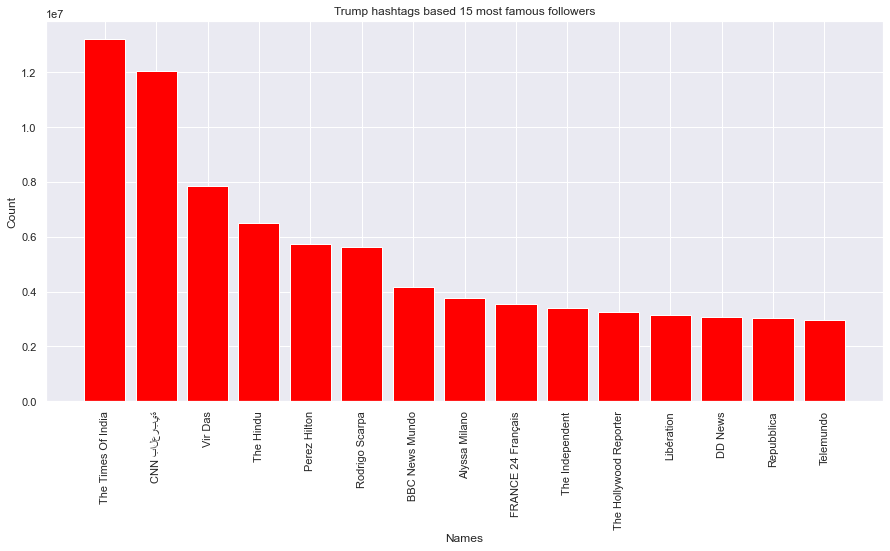

In [44]:
y=total_data.query('tweet_for=="Trump"').sort_values('user_followers_count',ascending=False).drop_duplicates(['user_name']).user_followers_count[:15]
x=total_data.query('tweet_for=="Trump"').sort_values('user_followers_count',ascending=False).drop_duplicates(['user_name']).user_name[:15]
plt.figure(figsize=(15, 7)) 
plt.bar(x, y,color='red')
plt.xticks(rotation=90)
plt.xlabel("Names") 
plt.ylabel("Count") 
plt.title("Trump hashtags based 15 most famous followers") 
plt.show() 

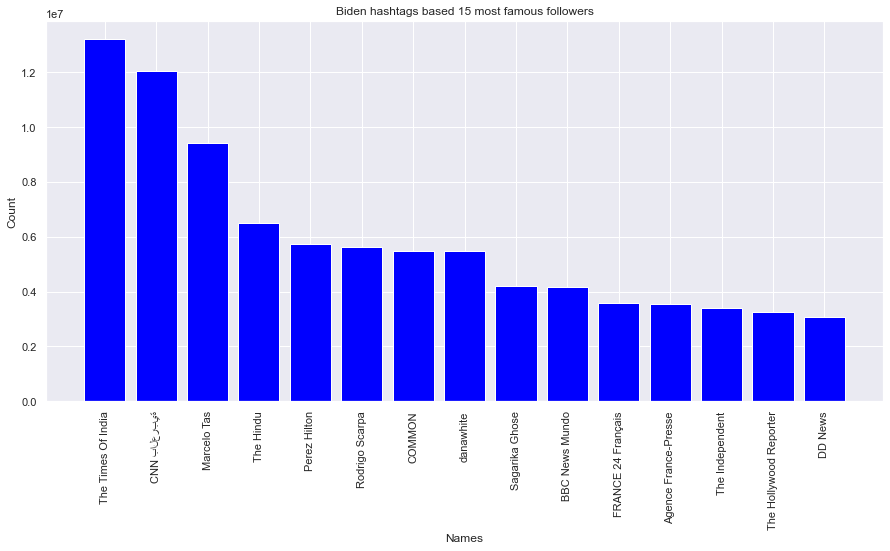

In [45]:
y=total_data.query('tweet_for=="Biden"').sort_values('user_followers_count',ascending=False).drop_duplicates(['user_name']).user_followers_count[:15]
x=total_data.query('tweet_for=="Biden"').sort_values('user_followers_count',ascending=False).drop_duplicates(['user_name']).user_name[:15]
plt.figure(figsize=(15, 7)) 
plt.bar(x, y,color='blue')
plt.xticks(rotation=90)
plt.xlabel("Names") 
plt.ylabel("Count") 
plt.title("Biden hashtags based 15 most famous followers") 
plt.show() 

In [46]:
def get_hashtags(df):
    df["hashtags"]=df.tweet.apply(lambda x: ",".join([tag.strip("#") for tag in x.split() if tag.startswith("#")]))
    allhashtags=",".join(df["hashtags"].values.tolist()).split(",")
    allhashtags=[i.upper() for i in allhashtags if i !=""]
    return allhashtags

In [47]:
trump_htags=get_hashtags(trump_data)
trump_list=pd.Series(trump_htags).value_counts()[:30].sort_values(ascending=False)

biden_htags=get_hashtags(biden_data)
biden_list=pd.Series(biden_htags).value_counts()[:30].sort_values(ascending=False)

Text(0.5, 1.0, 'Trump based top 30 hashtags')

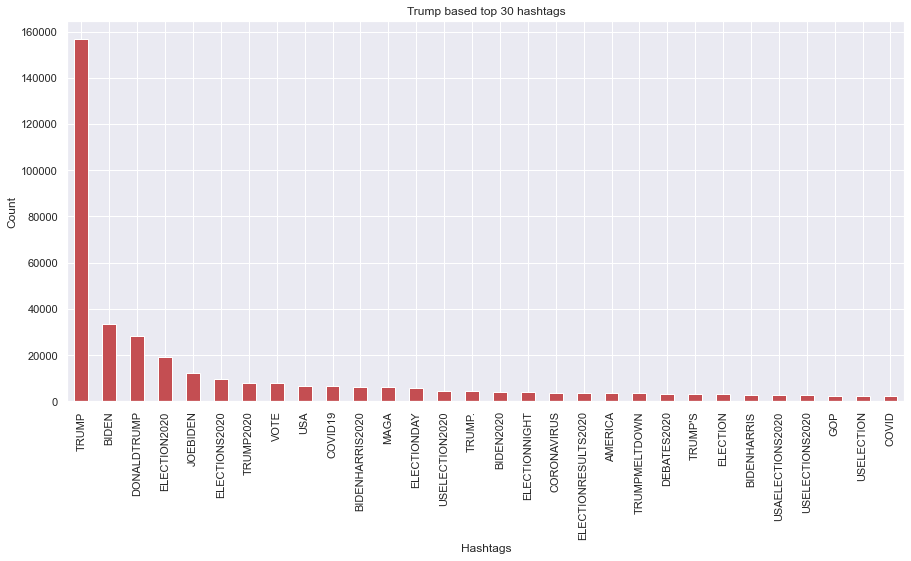

In [48]:
plt.figure(figsize=(15, 7)) 
trump_list.plot(kind="bar",color='r')
plt.xlabel("Hashtags") 
plt.ylabel("Count") 
plt.title("Trump based top 30 hashtags") 

Text(0.5, 1.0, 'Biden based top 30 hashtags')

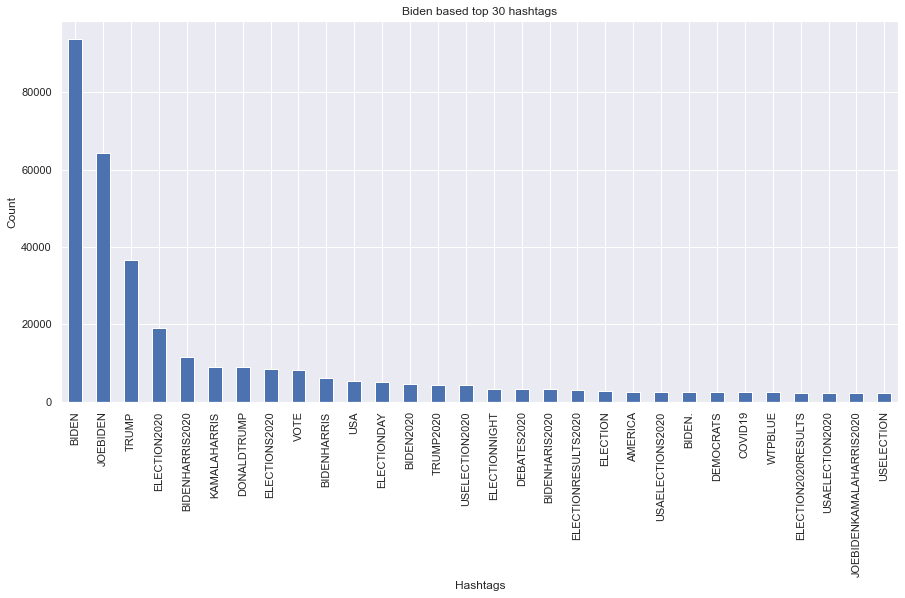

In [49]:
plt.figure(figsize=(15, 7)) 
biden_list.plot(kind="bar",color='b')
plt.xlabel("Hashtags") 
plt.ylabel("Count") 
plt.title("Biden based top 30 hashtags") 

# Sentimental Analysis

In [50]:
stop=stopwords.words('english')

In [51]:
def clean(text):
    text=re.sub(r':', '', str(text))
    text=re.sub(r'‚Ä¶', '', str(text))
    text=re.sub('@[A-Za-z0–9]+', '', str(text))               
    text=re.sub('#', '', str(text))
    text=re.sub('https?:\/\/\S+', '', str(text))
    text=re.sub(r'[^\x00-\x7F]+',' ',str(text))
    text=str(text).lower()
    text=re.sub('\[.*?\]', '', text)
    text=re.sub('https?://\S+|www\.\S+', '', text)
    text=re.sub('<.*?>+', '', text)
    text=re.sub('\n', '', text)
    text=re.sub('\w*\d\w*', '', text)
    text=re.sub(r'#','',text)
    text=re.sub(r'RT[\s]+','',text)
    text=re.sub(r'[^\w]', ' ', text)
    text=re.sub('https', '', text)
    text=re.sub('https ', '', text)
    text=re.sub('co', '', text)
    return text

In [52]:
def word_cloud(wd_list, title):
    stopwords=set(STOPWORDS)
    all_words=' '.join([text for text in wd_list])
    wordcloud=WordCloud(
        background_color='black',
        stopwords=stop,
        width=1600,
        height=800,
        random_state=1,
        colormap='jet',
        max_words=800,
        max_font_size=200).generate(all_words)
    plt.figure(figsize=(21,7))
    plt.axis('off')
    plt.title(title)
    plt.imshow(wordcloud, interpolation="bilinear");

In [53]:
total_data.head()

,created_at,tweet,likes,retweet_count,source,user_id,user_name,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,tweet_for
2,2020-10-15 00:00:02,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,1185.0,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,Trump
4,2020-10-15 00:00:08,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - رنا أبتر,5393.0,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,Trump
11,2020-10-15 00:00:25,"In 2020, #NYPost is being #censorship #CENSORE...",0.0,0.0,Twitter for iPhone,1.994033e+07,Change Illinois | Biden will increase taxes by...,1396.0,"Chicago, Illinois",41.875562,-87.624421,Chicago,United States of America,North America,Illinois,IL,Trump
12,2020-10-15 00:00:26,#Trump #PresidentTrump #Trump2020LandslideVict...,3.0,5.0,Twitter for Android,1.243315e+18,Ron Burgundy,496.0,"San Diego, CA",32.717421,-117.162771,San Diego,United States of America,North America,California,CA,Trump
13,2020-10-15 00:00:31,@Susan_Hutch @JoeBiden #Ukraine @RealDonaldTru...,2.0,0.0,Twitter Web App,3.439562e+08,Sebastian White,2755.0,Edinburgh ~ Heart of Scotland!,55.953346,-3.188375,City of Edinburgh,United Kingdom,Europe,Scotland,SCT,Trump


## Trump

In [54]:
trump_data_clean=total_data.query('(tweet_for=="Trump")').sort_values('created_at',ascending=False).drop_duplicates(['user_name'])
trump_data_clean['clean_tweet']=trump_data_clean['tweet'].apply(clean)


In [55]:
trump_blob=[TextBlob(desc) for desc in trump_data_clean['clean_tweet']]
trump_data_clean['polarity']=[b.sentiment.polarity for b in trump_blob]
trump_data_clean['subjectivity']=[b.sentiment.subjectivity for b in trump_blob]
trump_data_clean

,created_at,tweet,likes,retweet_count,source,user_id,user_name,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,tweet_for,clean_tweet,polarity,subjectivity
970912,2020-11-08 23:59:38,Stop laying @CNN !\n#Paris and #London dont gi...,0.0,0.0,Twitter for iPhone,3.873620e+08,flaquet,27.0,PARIS,48.856697,2.351462,Paris,France,Europe,Ile-de-France,IDF,Trump,stop laying paris and london dont give a fuc...,-0.4,0.6
970907,2020-11-08 23:59:25,"Donald Trump, Moscow, 1996, shared by @oooroma...",8.0,3.0,Twitter Web App,3.881374e+08,Elisabeth Schimpfössl,586.0,"London, England",51.507322,-0.127647,London,United Kingdom,Europe,England,ENG,Trump,donald trump mosw shared by trump t uw...,0.0,0.0
970896,2020-11-08 23:58:54,@TeamTrump @alex281832 #Trump is being made to...,1.0,0.0,Twitter for Android,5.008862e+08,Ken Noble😎,453.0,"West London, UK",51.532568,-0.480700,London,United Kingdom,Europe,England,ENG,Trump,trump is being made to embrace defeat via me...,-0.5,0.7
970895,2020-11-08 23:58:51,Have you know decency #Trump @GOP? Do you kno...,3.0,0.0,Twitter Web App,4.835231e+07,"Linda ""I Voted for Biden"" Kenney Baden",3024.0,"New York, USA",40.712728,-74.006015,New York,United States of America,North America,New York,NY,Trump,have you know decency trump do you know wha...,-0.6,0.7
970890,2020-11-08 23:58:44,Cómo pasó el abogado de Trump de un hotel a un...,0.0,1.0,Twitter Web App,8.496398e+07,Impacto Latino,1517.0,New York City,40.712728,-74.006015,New York,United States of America,North America,New York,NY,Trump,c mo pas el abogado de trump de un hotel a un...,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,2020-10-15 00:09:02,#BidenHarris #BidenHarris #BidenHarris #BidenH...,0.0,0.0,Twitter for iPhone,7.402017e+17,Americana,58.0,"Phoenix, AZ",33.448437,-112.074142,Phoenix,United States of America,North America,Arizona,AZ,Trump,bidenharris bidenharris bidenharris bidenharri...,0.0,0.0
173,2020-10-15 00:08:52,The President @realDonaldTrump got impeached f...,0.0,0.0,Twitter for iPhone,1.382486e+08,Pedro Gutierrez,2366.0,"Chicago, IL",41.875562,-87.624421,Chicago,United States of America,North America,Illinois,IL,Trump,the president got impeached for something joe...,0.0,0.0
109,2020-10-15 00:05:50,@JoeBiden #BidenHarris2020 #DonaldTrump #Hunte...,1.0,0.0,Twitter for Android,7.615802e+17,Joe Levija,58.0,"Fitchburg, WI",42.590366,-71.811984,Fitchburg,United States of America,North America,Massachusetts,MA,Trump,donaldtrump hunterbiden t tbdfpoedzx,0.0,0.0
75,2020-10-15 00:03:38,@JoeBiden #donaldtrump 4 more years!,0.0,0.0,Twitter Web App,1.657854e+07,Scott Seifferlein,430.0,Grand Rapids,42.963241,-85.667864,Grand Rapids,United States of America,North America,Michigan,MI,Trump,donaldtrump more years,0.5,0.5


In [56]:
trump_data_clean.loc[trump_data_clean.polarity>0,'sentiment']='positive'
trump_data_clean.loc[trump_data_clean.polarity==0,'sentiment']='neutral'
trump_data_clean.loc[trump_data_clean.polarity<0,'sentiment']='negative'
trump_data_clean

,created_at,tweet,likes,retweet_count,source,user_id,user_name,user_followers_count,user_location,lat,...,city,country,continent,state,state_code,tweet_for,clean_tweet,polarity,subjectivity,sentiment
970912,2020-11-08 23:59:38,Stop laying @CNN !\n#Paris and #London dont gi...,0.0,0.0,Twitter for iPhone,3.873620e+08,flaquet,27.0,PARIS,48.856697,...,Paris,France,Europe,Ile-de-France,IDF,Trump,stop laying paris and london dont give a fuc...,-0.4,0.6,negative
970907,2020-11-08 23:59:25,"Donald Trump, Moscow, 1996, shared by @oooroma...",8.0,3.0,Twitter Web App,3.881374e+08,Elisabeth Schimpfössl,586.0,"London, England",51.507322,...,London,United Kingdom,Europe,England,ENG,Trump,donald trump mosw shared by trump t uw...,0.0,0.0,neutral
970896,2020-11-08 23:58:54,@TeamTrump @alex281832 #Trump is being made to...,1.0,0.0,Twitter for Android,5.008862e+08,Ken Noble😎,453.0,"West London, UK",51.532568,...,London,United Kingdom,Europe,England,ENG,Trump,trump is being made to embrace defeat via me...,-0.5,0.7,negative
970895,2020-11-08 23:58:51,Have you know decency #Trump @GOP? Do you kno...,3.0,0.0,Twitter Web App,4.835231e+07,"Linda ""I Voted for Biden"" Kenney Baden",3024.0,"New York, USA",40.712728,...,New York,United States of America,North America,New York,NY,Trump,have you know decency trump do you know wha...,-0.6,0.7,negative
970890,2020-11-08 23:58:44,Cómo pasó el abogado de Trump de un hotel a un...,0.0,1.0,Twitter Web App,8.496398e+07,Impacto Latino,1517.0,New York City,40.712728,...,New York,United States of America,North America,New York,NY,Trump,c mo pas el abogado de trump de un hotel a un...,0.0,0.0,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,2020-10-15 00:09:02,#BidenHarris #BidenHarris #BidenHarris #BidenH...,0.0,0.0,Twitter for iPhone,7.402017e+17,Americana,58.0,"Phoenix, AZ",33.448437,...,Phoenix,United States of America,North America,Arizona,AZ,Trump,bidenharris bidenharris bidenharris bidenharri...,0.0,0.0,neutral
173,2020-10-15 00:08:52,The President @realDonaldTrump got impeached f...,0.0,0.0,Twitter for iPhone,1.382486e+08,Pedro Gutierrez,2366.0,"Chicago, IL",41.875562,...,Chicago,United States of America,North America,Illinois,IL,Trump,the president got impeached for something joe...,0.0,0.0,neutral
109,2020-10-15 00:05:50,@JoeBiden #BidenHarris2020 #DonaldTrump #Hunte...,1.0,0.0,Twitter for Android,7.615802e+17,Joe Levija,58.0,"Fitchburg, WI",42.590366,...,Fitchburg,United States of America,North America,Massachusetts,MA,Trump,donaldtrump hunterbiden t tbdfpoedzx,0.0,0.0,neutral
75,2020-10-15 00:03:38,@JoeBiden #donaldtrump 4 more years!,0.0,0.0,Twitter Web App,1.657854e+07,Scott Seifferlein,430.0,Grand Rapids,42.963241,...,Grand Rapids,United States of America,North America,Michigan,MI,Trump,donaldtrump more years,0.5,0.5,positive


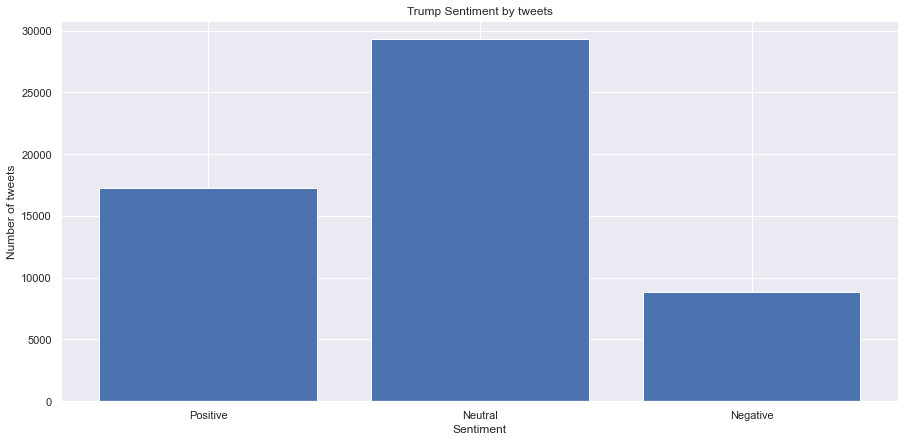

In [57]:
t_pos=len(trump_data_clean.loc[trump_data_clean.sentiment=='positive'])
t_neu=len(trump_data_clean.loc[trump_data_clean.sentiment=='neutral'])
t_neg=len(trump_data_clean.loc[trump_data_clean.sentiment=='negative'])

t_data={'Positive':t_pos,'Neutral':t_neu,'Negative':t_neg}
t_senti=list(t_data.keys()) 
t_ntweets=list(t_data.values()) 

plt.figure(figsize=(15, 7)) 
plt.bar(t_senti, t_ntweets) 
plt.xlabel("Sentiment") 
plt.ylabel("Number of tweets") 
plt.title("Trump Sentiment by tweets") 
plt.show() 

In [58]:
trump_words=[]
words=trump_data_clean['clean_tweet'].str.split().values.tolist()
trump_words=[word for i in words for word in i]

trump_counter=Counter(trump_words)
trump_most=trump_counter.most_common()

In [59]:
trump_x, trump_y=[], []
for word, count in trump_most[:100]:
    if word not in stop:
        trump_x.append(word)
        trump_y.append(count)

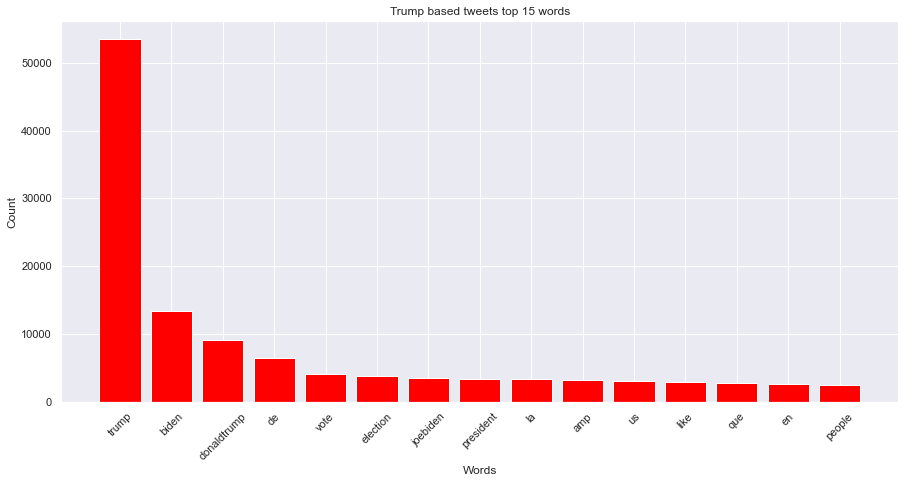

In [60]:
plt.figure(figsize=(15, 7)) 
plt.bar(trump_x[:15], trump_y[:15],color='red')
plt.xticks(rotation=45)
plt.xlabel("Words") 
plt.ylabel("Count") 
plt.title("Trump based tweets top 15 words") 
plt.show() 

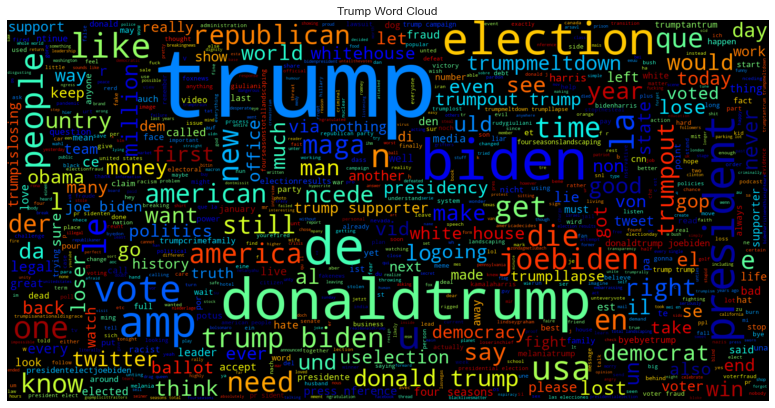

In [61]:
word_cloud(trump_data_clean['clean_tweet'][0:1000], 'Trump Word Cloud')

## Biden

In [62]:
biden_data_clean=total_data.query('(tweet_for=="Biden")').sort_values('created_at',ascending=False).drop_duplicates(['user_name'])
biden_data_clean['clean_tweet']=biden_data_clean['tweet'].apply(clean)


In [63]:
biden_blob=[TextBlob(desc) for desc in biden_data_clean['tweet']]
biden_data_clean['polarity']=[b.sentiment.polarity for b in biden_blob]
biden_data_clean['subjectivity']=[b.sentiment.subjectivity for b in biden_blob]
biden_data_clean

,created_at,tweet,likes,retweet_count,source,user_id,user_name,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,tweet_for,clean_tweet,polarity,subjectivity
776881,2020-11-08 23:59:38,Stop laying @CNN !\n#Paris and #London dont gi...,0.0,0.0,Twitter for iPhone,3.873620e+08,flaquet,27.0,PARIS,48.856697,2.351462,Paris,France,Europe,Ile-de-France,IDF,Biden,stop laying paris and london dont give a fuc...,-0.500000,0.600000
776876,2020-11-08 23:59:16,"Mr. #Biden, tear down that wall (with #Mexico)...",1.0,0.0,Twitter for iPhone,3.772296e+08,Tim Welch,444.0,"Auckland, NZ",-36.852095,174.763180,Auckland,New Zealand,Oceania,Auckland,AUK,Biden,mr biden tear down that wall with mexi wh...,0.242882,0.530556
737087,2020-11-08 23:58:51,Have you know decency #Trump @GOP? Do you kno...,3.0,0.0,Twitter Web App,4.835231e+07,"Linda ""I Voted for Biden"" Kenney Baden",3024.0,"New York, USA",40.712728,-74.006015,New York,United States of America,North America,New York,NY,Biden,have you know decency trump do you know wha...,-0.200000,0.400000
776869,2020-11-08 23:58:46,No puede ser lo #Panazis como siempre sacando ...,0.0,0.0,Twitter for iPhone,7.406354e+17,JeanCarlo,2313.0,"Tijuana, Baja California",32.501019,-116.964663,Tijuana,Mexico,North America,Baja California,BCN,Biden,no puede ser lo panazis mo siempre sacando el ...,-0.500000,0.750000
776865,2020-11-08 23:58:24,@FLOTUS I’m excited to have a FLOTUS whose vag...,0.0,0.0,Twitter for iPhone,5.545625e+07,Caroline Billinson,436.0,"Washington, DC",38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,Biden,i m excited to have a flotus whose vagina i h...,0.375000,0.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,2020-10-15 00:05:22,#Biden lied https://t.co/Lqy0TBpXkg,3.0,0.0,Twitter for iPhone,5.052006e+08,Todd Nelon,106.0,"Atlanta, GA",33.749099,-84.390185,Atlanta,United States of America,North America,Georgia,GA,Biden,biden lied t,0.000000,0.000000
53,2020-10-15 00:03:24,This is from the same night I met the cast of ...,0.0,0.0,Twitter for iPhone,5.581804e+08,🦩 Hannah for Biden/Harris🦩,133.0,"Indianapolis, IN",39.768333,-86.158350,Indianapolis,United States of America,North America,Indiana,IN,Biden,this is from the same night i met the cast of ...,0.000000,0.125000
52,2020-10-15 00:03:23,Hunter #Biden introduced Ukrainian businessman...,1.0,2.0,Twitter for iPhone,2.964581e+09,Adam K.Pawłowski🇵🇱,4345.0,"Poland, Warsaw",52.231958,21.006725,Warsaw,Poland,Europe,Masovian Voivodeship,MA,Biden,hunter biden introduced ukrainian businessman ...,-0.050446,0.433929
29,2020-10-15 00:02:06,Come on @ABC PLEASE DO THE RIGHT THING. Move t...,0.0,0.0,Twitter Web App,3.343224e+08,Elphygirl,166.0,"New York, NY",40.712728,-74.006015,New York,United States of America,North America,New York,NY,Biden,me on please do the right thing move the bid...,0.078571,0.178571


In [64]:
biden_data_clean.loc[biden_data_clean.polarity>0,'sentiment']='positive'
biden_data_clean.loc[biden_data_clean.polarity==0,'sentiment']='neutral'
biden_data_clean.loc[biden_data_clean.polarity<0,'sentiment']='negative'
biden_data_clean

,created_at,tweet,likes,retweet_count,source,user_id,user_name,user_followers_count,user_location,lat,...,city,country,continent,state,state_code,tweet_for,clean_tweet,polarity,subjectivity,sentiment
776881,2020-11-08 23:59:38,Stop laying @CNN !\n#Paris and #London dont gi...,0.0,0.0,Twitter for iPhone,3.873620e+08,flaquet,27.0,PARIS,48.856697,...,Paris,France,Europe,Ile-de-France,IDF,Biden,stop laying paris and london dont give a fuc...,-0.500000,0.600000,negative
776876,2020-11-08 23:59:16,"Mr. #Biden, tear down that wall (with #Mexico)...",1.0,0.0,Twitter for iPhone,3.772296e+08,Tim Welch,444.0,"Auckland, NZ",-36.852095,...,Auckland,New Zealand,Oceania,Auckland,AUK,Biden,mr biden tear down that wall with mexi wh...,0.242882,0.530556,positive
737087,2020-11-08 23:58:51,Have you know decency #Trump @GOP? Do you kno...,3.0,0.0,Twitter Web App,4.835231e+07,"Linda ""I Voted for Biden"" Kenney Baden",3024.0,"New York, USA",40.712728,...,New York,United States of America,North America,New York,NY,Biden,have you know decency trump do you know wha...,-0.200000,0.400000,negative
776869,2020-11-08 23:58:46,No puede ser lo #Panazis como siempre sacando ...,0.0,0.0,Twitter for iPhone,7.406354e+17,JeanCarlo,2313.0,"Tijuana, Baja California",32.501019,...,Tijuana,Mexico,North America,Baja California,BCN,Biden,no puede ser lo panazis mo siempre sacando el ...,-0.500000,0.750000,negative
776865,2020-11-08 23:58:24,@FLOTUS I’m excited to have a FLOTUS whose vag...,0.0,0.0,Twitter for iPhone,5.545625e+07,Caroline Billinson,436.0,"Washington, DC",38.894992,...,Washington,United States of America,North America,District of Columbia,DC,Biden,i m excited to have a flotus whose vagina i h...,0.375000,0.750000,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,2020-10-15 00:05:22,#Biden lied https://t.co/Lqy0TBpXkg,3.0,0.0,Twitter for iPhone,5.052006e+08,Todd Nelon,106.0,"Atlanta, GA",33.749099,...,Atlanta,United States of America,North America,Georgia,GA,Biden,biden lied t,0.000000,0.000000,neutral
53,2020-10-15 00:03:24,This is from the same night I met the cast of ...,0.0,0.0,Twitter for iPhone,5.581804e+08,🦩 Hannah for Biden/Harris🦩,133.0,"Indianapolis, IN",39.768333,...,Indianapolis,United States of America,North America,Indiana,IN,Biden,this is from the same night i met the cast of ...,0.000000,0.125000,neutral
52,2020-10-15 00:03:23,Hunter #Biden introduced Ukrainian businessman...,1.0,2.0,Twitter for iPhone,2.964581e+09,Adam K.Pawłowski🇵🇱,4345.0,"Poland, Warsaw",52.231958,...,Warsaw,Poland,Europe,Masovian Voivodeship,MA,Biden,hunter biden introduced ukrainian businessman ...,-0.050446,0.433929,negative
29,2020-10-15 00:02:06,Come on @ABC PLEASE DO THE RIGHT THING. Move t...,0.0,0.0,Twitter Web App,3.343224e+08,Elphygirl,166.0,"New York, NY",40.712728,...,New York,United States of America,North America,New York,NY,Biden,me on please do the right thing move the bid...,0.078571,0.178571,positive


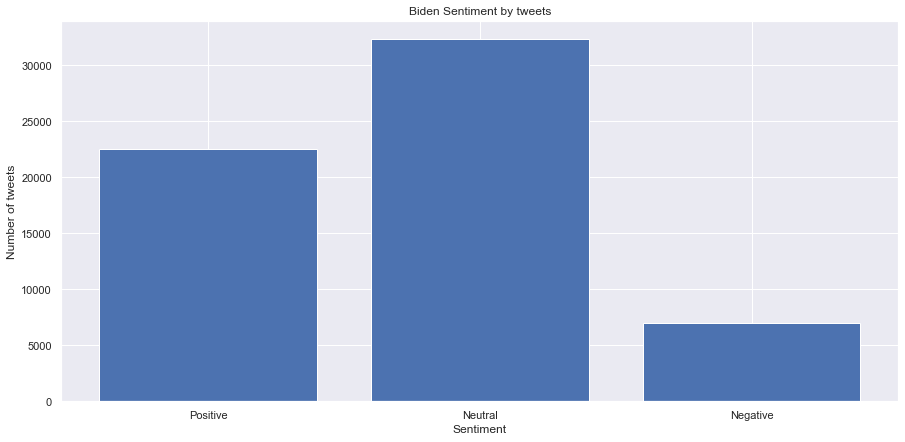

In [65]:
b_pos=len(biden_data_clean.loc[biden_data_clean.sentiment=='positive'])
b_neu=len(biden_data_clean.loc[biden_data_clean.sentiment=='neutral'])
b_neg=len(biden_data_clean.loc[biden_data_clean.sentiment=='negative'])

b_data={'Positive':b_pos,'Neutral':b_neu,'Negative':b_neg}
b_senti=list(b_data.keys()) 
b_ntweets=list(b_data.values()) 

plt.figure(figsize=(15, 7)) 
plt.bar(b_senti, b_ntweets) 
plt.xlabel("Sentiment") 
plt.ylabel("Number of tweets") 
plt.title("Biden Sentiment by tweets") 
plt.show() 

In [66]:
biden_words=[]
words=biden_data_clean['clean_tweet'].str.split().values.tolist()
biden_words=[word for i in words for word in i]

biden_counter=Counter(biden_words)
biden_most=biden_counter.most_common()


In [67]:
biden_x, biden_y=[], []
for word, count in biden_most[:100]:
    if word not in stop:
        biden_x.append(word)
        biden_y.append(count)

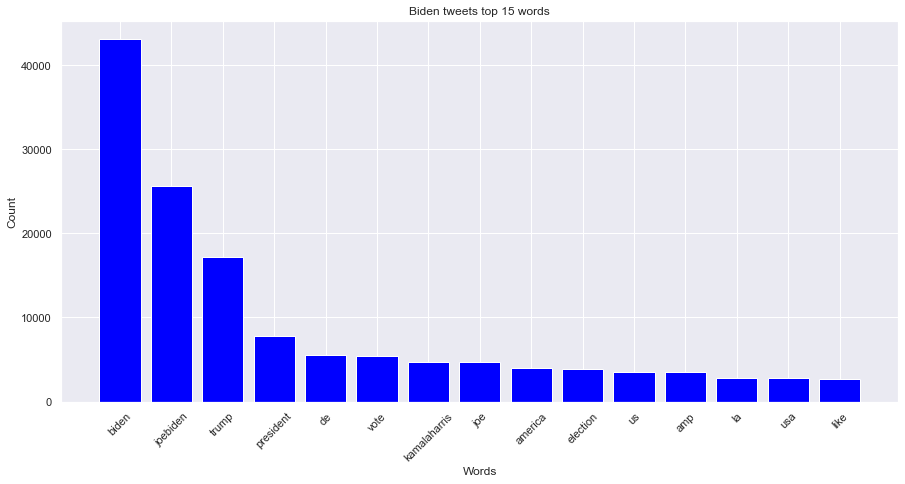

In [68]:
plt.figure(figsize=(15, 7)) 
plt.bar(biden_x[:15], biden_y[:15],color='blue')
plt.xticks(rotation=45)
plt.xlabel("Words") 
plt.ylabel("Count") 
plt.title("Biden tweets top 15 words") 
plt.show() 

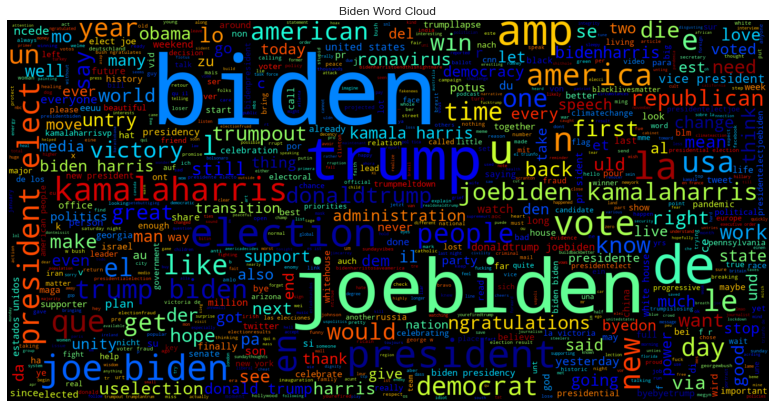

In [69]:
word_cloud(biden_data_clean['clean_tweet'][0:1000], 'Biden Word Cloud')

## Both

In [70]:
total_data_new=pd.concat([trump_data_clean,biden_data_clean])
total_data_new.sort_values(by='created_at')

,created_at,tweet,likes,retweet_count,source,user_id,user_name,user_followers_count,user_location,lat,...,city,country,continent,state,state_code,tweet_for,clean_tweet,polarity,subjectivity,sentiment
29,2020-10-15 00:01:30,@karatblood @KazePlays_JC Grab @realDonaldTrum...,2.0,0.0,Twitter for iPhone,3.602439e+07,Baylee,1952.0,"Western Washington, USA",41.882823,...,Chicago,United States of America,North America,Illinois,IL,Trump,_jc grab by the balls amp chuck the bastar...,0.000000,1.000000,neutral
25,2020-10-15 00:01:57,@RealJamesWoods #BidenCrimeFamily #JoeBiden #H...,0.0,0.0,Twitter for Android,1.300837e+18,Sam KEYS,29.0,"Los Angeles, CA",34.053691,...,Los Angeles,United States of America,North America,California,CA,Biden,bidencrimefamily joebiden hunterbiden hunterb...,0.000000,0.000000,neutral
29,2020-10-15 00:02:06,Come on @ABC PLEASE DO THE RIGHT THING. Move t...,0.0,0.0,Twitter Web App,3.343224e+08,Elphygirl,166.0,"New York, NY",40.712728,...,New York,United States of America,North America,New York,NY,Biden,me on please do the right thing move the bid...,0.078571,0.178571,positive
52,2020-10-15 00:03:23,Hunter #Biden introduced Ukrainian businessman...,1.0,2.0,Twitter for iPhone,2.964581e+09,Adam K.Pawłowski🇵🇱,4345.0,"Poland, Warsaw",52.231958,...,Warsaw,Poland,Europe,Masovian Voivodeship,MA,Biden,hunter biden introduced ukrainian businessman ...,-0.050446,0.433929,negative
53,2020-10-15 00:03:24,This is from the same night I met the cast of ...,0.0,0.0,Twitter for iPhone,5.581804e+08,🦩 Hannah for Biden/Harris🦩,133.0,"Indianapolis, IN",39.768333,...,Indianapolis,United States of America,North America,Indiana,IN,Biden,this is from the same night i met the cast of ...,0.000000,0.125000,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970896,2020-11-08 23:58:54,@TeamTrump @alex281832 #Trump is being made to...,1.0,0.0,Twitter for Android,5.008862e+08,Ken Noble😎,453.0,"West London, UK",51.532568,...,London,United Kingdom,Europe,England,ENG,Trump,trump is being made to embrace defeat via me...,-0.500000,0.700000,negative
776876,2020-11-08 23:59:16,"Mr. #Biden, tear down that wall (with #Mexico)...",1.0,0.0,Twitter for iPhone,3.772296e+08,Tim Welch,444.0,"Auckland, NZ",-36.852095,...,Auckland,New Zealand,Oceania,Auckland,AUK,Biden,mr biden tear down that wall with mexi wh...,0.242882,0.530556,positive
970907,2020-11-08 23:59:25,"Donald Trump, Moscow, 1996, shared by @oooroma...",8.0,3.0,Twitter Web App,3.881374e+08,Elisabeth Schimpfössl,586.0,"London, England",51.507322,...,London,United Kingdom,Europe,England,ENG,Trump,donald trump mosw shared by trump t uw...,0.000000,0.000000,neutral
776881,2020-11-08 23:59:38,Stop laying @CNN !\n#Paris and #London dont gi...,0.0,0.0,Twitter for iPhone,3.873620e+08,flaquet,27.0,PARIS,48.856697,...,Paris,France,Europe,Ile-de-France,IDF,Biden,stop laying paris and london dont give a fuc...,-0.500000,0.600000,negative


In [71]:
total_data_new.isnull().sum()

created_at              0
tweet                   0
likes                   0
retweet_count           0
source                  0
user_id                 0
user_name               0
user_followers_count    0
user_location           0
lat                     0
long                    0
city                    0
country                 0
continent               0
state                   0
state_code              0
tweet_for               0
clean_tweet             0
polarity                0
subjectivity            0
sentiment               0
dtype: int64

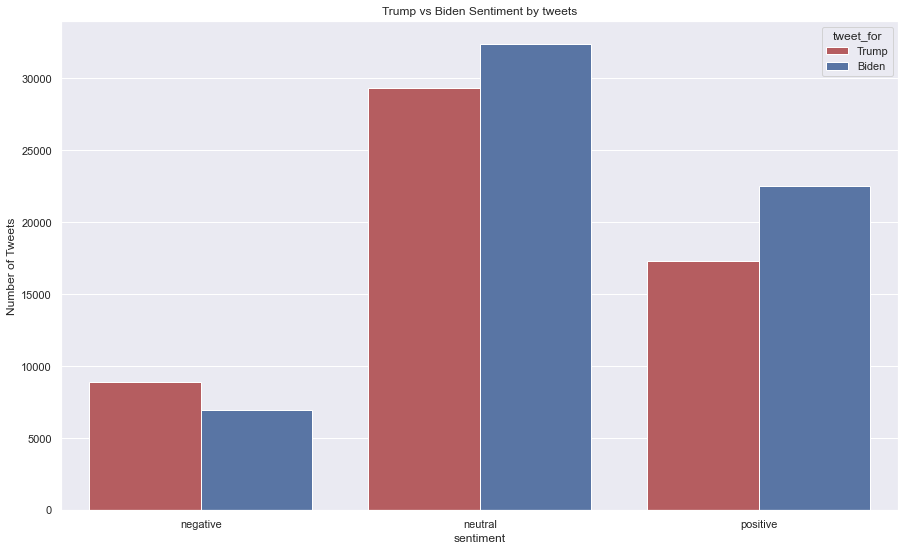

In [72]:
plt.figure(figsize=(15,9))
bar_plot=sns.countplot(x='sentiment', hue='tweet_for', data=total_data_new, palette=['r','b'])
#plt.ylim(0, 20)
#plt.xlim(0, 3)
plt.xticks(rotation=0)
plt.ylabel('Number of Tweets')
plt.title('Trump vs Biden Sentiment by tweets')
plt.show()

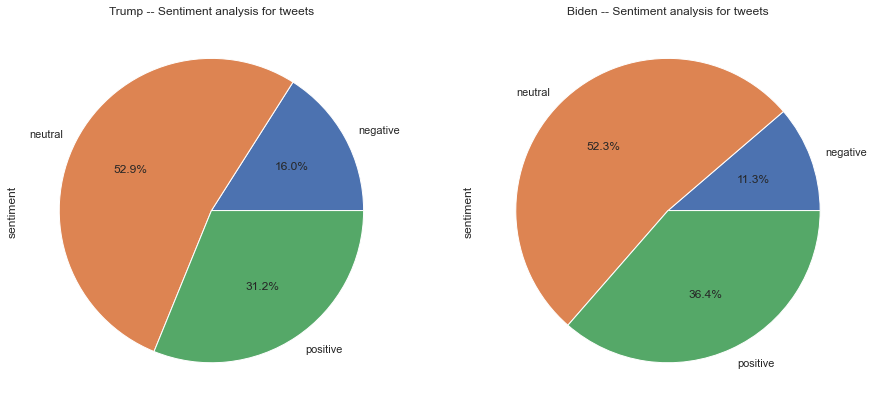

In [73]:
plt.subplots(2, 1, figsize=(15, 7))
plt.subplot(1, 2, 1)
grap=trump_data_clean.groupby('sentiment').sentiment.count()
plt.title('Trump -- Sentiment analysis for tweets')
grap.plot.pie(autopct="%.1f%%");

plt.subplot(1, 2, 2)
grap=biden_data_clean.groupby('sentiment').sentiment.count()
plt.title('Biden -- Sentiment analysis for tweets')
grap.plot.pie(autopct="%.1f%%");

### we can see according to the sentiment analysis of tweets

### Trump got 31.2% positive tweets

### Biden got 36.4% positive tweets

In [74]:
trump_data_clean['date']=pd.to_datetime(trump_data_clean['created_at']).dt.date
biden_data_clean['date']=pd.to_datetime(biden_data_clean['created_at']).dt.date

Text(0.5, 0, 'Date')

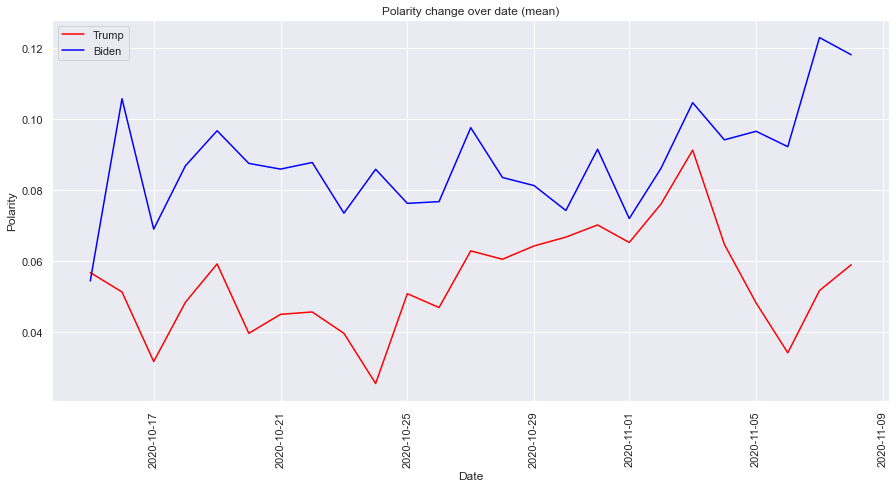

In [75]:
#plt.suptitle('')
plt.figure(figsize=(15, 7)) 
sns.lineplot(data=trump_data_clean.groupby('date')['polarity'].mean(), label='Trump', color='red')
sns.lineplot(data=biden_data_clean.groupby('date')['polarity'].mean(), label='Biden', color='blue')
plt.xticks(rotation=90)
plt.title('Polarity change over date (mean)')
plt.ylabel('Polarity')
plt.xlabel('Date')

In [76]:
t_pos_1=trump_data_clean[trump_data_clean['polarity']>0]
t_neg_1=trump_data_clean[trump_data_clean['polarity']<0]

b_pos_1=biden_data_clean[biden_data_clean['polarity']>0]
b_neg_1=biden_data_clean[biden_data_clean['polarity']<0]

Text(0.5, 0, 'Date')

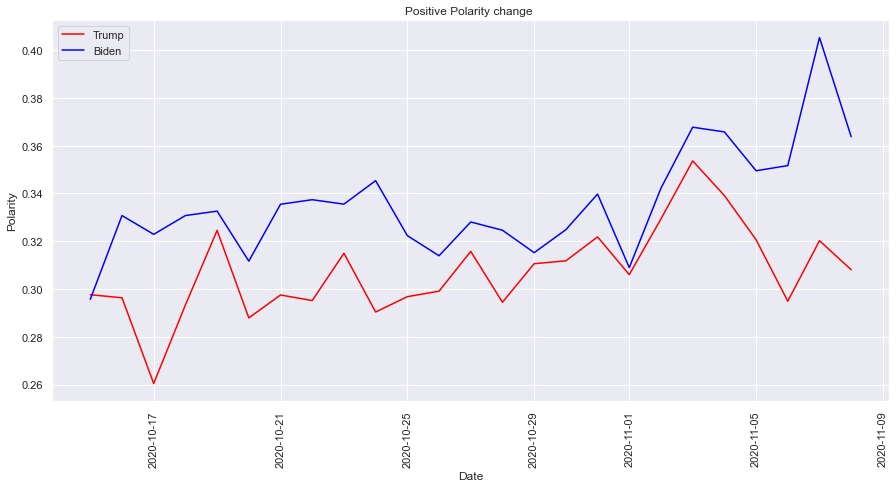

In [77]:
plt.figure(figsize=(15, 7)) 
sns.lineplot(data=t_pos_1.groupby('date')['polarity'].mean(), label='Trump', color='red')
sns.lineplot(data=b_pos_1.groupby('date')['polarity'].mean(), label='Biden', color='blue')
plt.xticks(rotation=90)
plt.title('Positive Polarity change ')
plt.ylabel('Polarity')
plt.xlabel('Date')

Text(0.5, 0, 'Date')

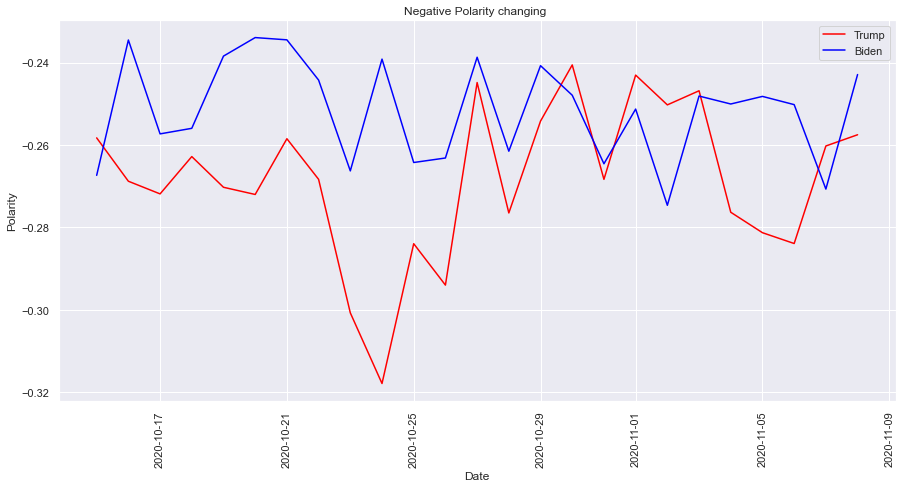

In [78]:
plt.figure(figsize=(15, 7)) 
sns.lineplot(data=t_neg_1.groupby('date')['polarity'].mean(), label='Trump', color='red')
sns.lineplot(data=b_neg_1.groupby('date')['polarity'].mean(), label='Biden', color='blue')
plt.xticks(rotation=90)
plt.title('Negative Polarity changing ')
plt.ylabel('Polarity')
plt.xlabel('Date')

### We can see that tweets for Biden are more positive through these graphs.

# Applying Machine Learning models

## Feature extraction using CountVectorizer

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

X=total_data_new['tweet']
countvector=CountVectorizer(max_features=10000, min_df=2, stop_words='english')
X=countvector.fit_transform(X)
X.toarray()
y=total_data_new['sentiment']

In [80]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)

## Logistic Regression

In [81]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train, y_train)
prediction=model.predict(X_test)
prediction

E:\000_NEU\Sft\Acon3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array(['neutral', 'negative', 'positive', ..., 'neutral', 'negative',
       'positive'], dtype=object)

In [122]:
from sklearn.metrics import f1_score, confusion_matrix
lr = f1_score(y_test, prediction, average='weighted')
lr

0.8963448187177195

In [83]:
confusion_matrix(y_test, prediction)

array([[ 2283,   435,   436],
       [  101, 12034,   292],
       [  318,   805,  6774]], dtype=int64)

## Gaussian Naive Bayes

In [84]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train.toarray(), y_train)
predictgnb=gnb.predict(X_test.toarray())
predictgnb

array(['neutral', 'negative', 'negative', ..., 'negative', 'negative',
       'negative'], dtype='<U8')

In [85]:
f1_score(y_test, predictgnb, average='weighted')

0.3350872892076549

In [86]:
confusion_matrix(y_test, predictgnb)

array([[2873,   76,  205],
       [8653, 3194,  580],
       [6400,  223, 1274]], dtype=int64)

## Support Vector Machine

In [87]:
from sklearn import svm
classifier=svm.LinearSVC(C=0.1)
classifier.fit(X_train, y_train)
predictsvm=classifier.predict(X_test)
predictsvm

E:\000_NEU\Sft\Acon3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


array(['neutral', 'negative', 'positive', ..., 'neutral', 'negative',
       'positive'], dtype=object)

In [124]:
s = f1_score(y_test, predictsvm, average='weighted')
s

0.9015135260785873

In [89]:
confusion_matrix(y_test, predictsvm)

array([[ 2320,   449,   385],
       [   83, 12112,   232],
       [  292,   825,  6780]], dtype=int64)

In [90]:
# rbf SVM
clf=svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)
predictsvmr=clf.predict(X_test)
predictsvmr


array(['neutral', 'neutral', 'positive', ..., 'neutral', 'negative',
       'positive'], dtype=object)

In [91]:
r = f1_score(y_test, predictsvmr, average='weighted')
r

0.8788579441451575

In [92]:
confusion_matrix(y_test, predictsvmr)

array([[ 1979,   652,   523],
       [   48, 12118,   261],
       [  221,  1039,  6637]], dtype=int64)

In [93]:
# Linear SVM
clf=svm.SVC(kernel='linear', C=1.0)
clf.fit(X_train, y_train)
predictsvmr1=clf.predict(X_test)
predictsvmr1


array(['neutral', 'negative', 'positive', ..., 'neutral', 'negative',
       'positive'], dtype=object)

In [94]:
l = f1_score(y_test, predictsvmr1, average='weighted')
l

0.899154014293509

In [95]:
confusion_matrix(y_test, predictsvmr1)

array([[ 2385,   351,   418],
       [  131, 12025,   271],
       [  428,   737,  6732]], dtype=int64)

In [96]:
from sklearn.ensemble import RandomForestClassifier
classif=RandomForestClassifier(n_estimators=200, random_state=0)
classif.fit(X_train, y_train)
predictforest=classif.predict(X_test)
predictforest

array(['neutral', 'positive', 'positive', ..., 'neutral', 'negative',
       'positive'], dtype=object)

In [97]:
rf = f1_score(y_test, predictforest, average='weighted')
rf

0.8604397480803933

In [98]:
confusion_matrix(y_test, predictforest)

array([[ 1720,   753,   681],
       [   39, 12066,   322],
       [  183,  1143,  6571]], dtype=int64)

## Feature extraction using TFIDF Vectorizer

In [99]:
from sklearn.feature_extraction.text import TfidfVectorizer
X1 = total_data_new['tweet']
tfidf = TfidfVectorizer(max_features=10000, sublinear_tf=True, min_df=5, stop_words='english')
X1 = tfidf.fit_transform(X1)
X1.toarray()
y1 = total_data_new['sentiment']

In [100]:
X_traint, X_testt, y_traint, y_testt = train_test_split(X1, y1, test_size=0.2, random_state=0)

## Logistic Regression

In [101]:
model1 = LogisticRegression()
model1.fit(X_traint, y_traint)
prediction1 = model.predict(X_testt)
prediction1

E:\000_NEU\Sft\Acon3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array(['neutral', 'neutral', 'neutral', ..., 'neutral', 'neutral',
       'neutral'], dtype=object)

In [102]:
l2 = f1_score(y_testt, prediction1, average='micro')
l2

0.5515802027429935

In [103]:
confusion_matrix(y_testt, prediction1)

array([[   41,  2980,   133],
       [   48, 11981,   398],
       [   69,  6900,   928]], dtype=int64)

## Gaussian Naive Bayes

#y2 = total_data_new['sentiment'].astype(np.uint8)
#X_traing, X_testg, y_traing, y_testg = train_test_split(X1, y2, test_size=0.2, random_state=0)
gnb1 = GaussianNB()
gnb1.fit(X_traint.toarray(), y_traint)
predictgnb1 = gnb1.predict(X_testt.toarray())
predictgnb1


MemoryError                               Traceback (most recent call last)
<ipython-input-109-93dde5bc0d62> in <module>
      2 #X_traing, X_testg, y_traing, y_testg = train_test_split(X1, y2, test_size=0.2, random_state=0)
      3 gnb1 = GaussianNB()
----> 4 gnb1.fit(X_traint.toarray(), y_traint)
      5 predictgnb1 = gnb1.predict(X_testt.toarray())
      6 predictgnb1

E:\000_NEU\Sft\Acon3\lib\site-packages\scipy\sparse\compressed.py in toarray(self, order, out)
   1023         if out is None and order is None:
   1024             order = self._swap('cf')[0]
-> 1025         out = self._process_toarray_args(order, out)
   1026         if not (out.flags.c_contiguous or out.flags.f_contiguous):
   1027             raise ValueError('Output array must be C or F contiguous')

E:\000_NEU\Sft\Acon3\lib\site-packages\scipy\sparse\base.py in _process_toarray_args(self, order, out)
   1183             return out
   1184         else:
-> 1185             return np.zeros(self.shape, dtype=self.dtype, order=order)
   1186 
   1187 

MemoryError: Unable to allocate 7.00 GiB for an array with shape (93911, 10000) and data type float64

In [130]:
#g2 = f1_score(y_testt, predictgnb1, average='weighted')
#g2

In [131]:
#confusion_matrix(y_testt, predictgnb1)

## Support Vector Machine

In [110]:
classifier1 = svm.LinearSVC(C=0.1)
classifier1.fit(X_traint, y_traint)
predictsvm1 = classifier.predict(X_testt)
predictsvm1

array(['neutral', 'neutral', 'neutral', ..., 'neutral', 'neutral',
       'neutral'], dtype=object)

In [111]:
s2 = f1_score(y_testt, predictsvm1, average='weighted')
s2

0.4246981593822571

In [112]:
confusion_matrix(y_testt, predictsvm1)

array([[   38,  3027,    89],
       [   49, 12057,   321],
       [   59,  7126,   712]], dtype=int64)

In [113]:
# rbf SVM
clf1=svm.SVC(kernel='rbf')
clf.fit(X_traint, y_traint)
predictsv=clf.predict(X_testt)
predictsv

array(['neutral', 'positive', 'positive', ..., 'neutral', 'negative',
       'positive'], dtype=object)

In [114]:
r1 = f1_score(y_testt, predictsv, average='weighted')
r1

0.8990445561648374

In [115]:
confusion_matrix(y_testt, predictsv)

array([[ 2271,   461,   422],
       [   59, 12166,   202],
       [  314,   857,  6726]], dtype=int64)

In [116]:
# Linear SVM
clf2=svm.SVC(kernel='linear', C=1.0)
clf2.fit(X_traint, y_traint)
predictsvmr2=clf.predict(X_testt)
predictsvmr2

array(['neutral', 'positive', 'positive', ..., 'neutral', 'negative',
       'positive'], dtype=object)

In [117]:
l1 = f1_score(y_testt, predictsvmr2, average='weighted')
l1

0.8990445561648374

In [118]:
confusion_matrix(y_testt, predictsvmr2)

array([[ 2271,   461,   422],
       [   59, 12166,   202],
       [  314,   857,  6726]], dtype=int64)

In [119]:
from sklearn.ensemble import RandomForestClassifier
classif1=RandomForestClassifier(n_estimators=200, random_state=0)
classif1.fit(X_traint, y_traint)
predictforest1=classif1.predict(X_testt)
predictforest1

array(['neutral', 'neutral', 'positive', ..., 'neutral', 'negative',
       'positive'], dtype=object)

In [120]:
rf1 = f1_score(y_testt, predictforest1, average='weighted')
rf1

0.8463556634610401

In [121]:
confusion_matrix(y_testt, predictforest1)

array([[ 1585,   645,   924],
       [   34, 11788,   605],
       [  158,  1070,  6669]], dtype=int64)

## Out of the two feature extraction techniques it is observed that best results are obtained with CountVectorizer.

## Comparing the models based on CountVectorizer features

In [125]:
model1 = ['LogisticRegression(CV)', 'LinearSVC(CV)', 'SVC-Kernel=rbf(CV)', 'SVC-Kernel=linear(CV)', 'RandomForestClassifier(CV)']
score1 = [lr, s, r, l, rf]
compare1 = pd.DataFrame({'Model': model1, 'F1-score': score1}, index=[1, 2, 3, 4, 5])
compare1

,Model,F1-score
1,LogisticRegression(CV),0.896345
2,LinearSVC(CV),0.901514
3,SVC-Kernel=rbf(CV),0.878858
4,SVC-Kernel=linear(CV),0.899154
5,RandomForestClassifier(CV),0.860440


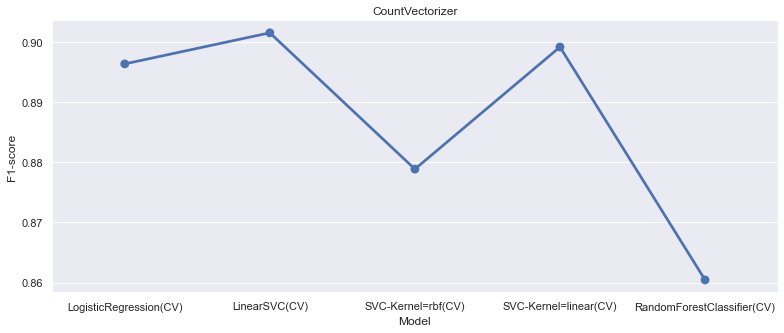

In [126]:
plt.figure(figsize=(13,5))
sns.pointplot(x='Model', y='F1-score', data=compare1)
plt.title('CountVectorizer')
plt.xlabel('Model')
plt.ylabel('F1-score')
plt.show()

## Comparing the models based on TF-IDFVectorizer features

In [128]:
model2 = ['LogisticRegression(TF-IDF)', 'LinearSVC(TF-IDF)', 'SVC-Kernel=rbf(TF-IDF)', 'SVC-Kernel=linear(TF-IDF)', 'RandomForestClassifier(TF-IDF)']
score2 = [l2, s2, r1, l1, rf1]
compare2 = pd.DataFrame({'Model': model1, 'F1-score': score1}, index=[1, 2, 3, 4, 5])
compare2

,Model,F1-score
1,LogisticRegression(TF-IDF),0.551580
2,LinearSVC(TF-IDF),0.424698
3,SVC-Kernel=rbf(TF-IDF),0.899045
4,SVC-Kernel=linear(TF-IDF),0.899045
5,RandomForestClassifier(TF-IDF),0.846356


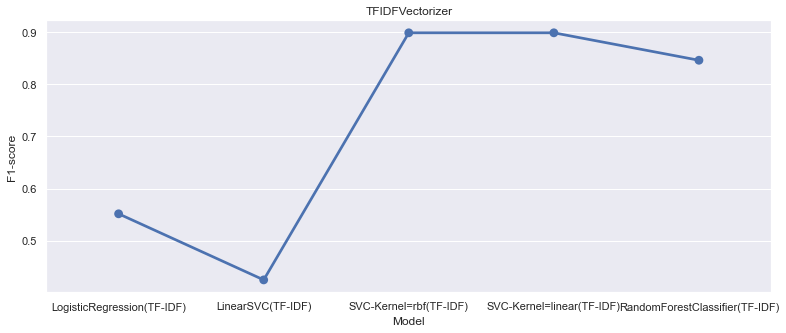

In [129]:
plt.figure(figsize=(13,5))
sns.pointplot(x='Model', y='F1-score', data=compare2)
plt.title('TFIDFVectorizer')
plt.xlabel('Model')
plt.ylabel('F1-score')
plt.show()